<img src = "https://github.com/DennisFelixuff/Financas/blob/main/logo_dennis.jpg
?raw=true" width = "250">


# **Simulação de Portfólios com o Método de Monte Carlo**

O método de Monte Carlo é uma técnica estatística e computacional que usa números aleatórios para resolver problemas matemáticos complexos através da simulação de múltiplas amostras.

A ideia básica é usar a aleatoriedade para aproximar soluções em problemas que são difíceis ou impossíveis de resolver de forma analítica.

Na prática, o método de Monte Carlo funciona gerando uma grande quantidade de números aleatórios que seguem uma distribuição específica e, em seguida, usando esses números para estimar valores de interesse. Isso pode incluir estimar integrais, resolver equações diferenciais, simular sistemas físicos complexos, calcular probabilidades, entre outros.

### **Fundamentos do método de Monte Carlo**

* Gerar variáveis aleatórias de acordo com alguma distribuição
* Usar estas variáveis aleatóras na condução de algum experimento

Vamos utilizar o método de Monte Carlo para simular portfólios de investimento.

Simularemos os retornos diários dos ativos deste portfólio, e com base nestes retornos diários vamos calcular o retorno acumulado destes vários portfólios ao longo do tempo.

##Observações Importantes!

* A matriz de covariância mede como diferentes ativos se movem juntos. Ela descreve como os retornos de diferentes ativos se relacionam entre si;
* Desta forma, usar a matriz de covariância é um recurso que nós temos para simular retornos diários que façam sentido de acordo com o comportamento atual destes ativos;

Referência para entender o método de Monte Carlo:

https://www.youtube.com/watch?v=OFr4JPK12DE&list=PLPe-_ytPHqyh3E5EdDAxOwHQkB0eDOpZb&index=11

https://pt.wikipedia.org/wiki/Fatora%C3%A7%C3%A3o_de_Cholesky#:~:text=Em%20%C3%A1lgebra%20linear%2C%20a%20decomposi%C3%A7%C3%A3o,e%20simula%C3%A7%C3%B5es%20de%20Monte%20Carlo.

## 1. Importação das bibliotecas e captura dos dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import numpy as np

In [ ]:
fim = '2024-01-15'
inicio = '2023-01-15'

In [ ]:
acoes = [ 'WEGE3.SA', 'MGLU3.SA', 'PRIO3.SA']

In [ ]:
dados = yf.download(acoes,start=inicio, end=fim)['Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
dados.head()

Ticker,MGLU3.SA,PRIO3.SA,WEGE3.SA
Date,,,
2023-01-16 00:00:00+00:00,36.009949,39.070000,37.689999
2023-01-17 00:00:00+00:00,35.448753,38.740002,38.310001
2023-01-18 00:00:00+00:00,33.297508,38.970001,37.990002
2023-01-19 00:00:00+00:00,35.635818,40.520000,37.910000
2023-01-20 00:00:00+00:00,35.729351,41.099998,37.330002


## 2. Cálulo das métricas quantitativas

In [ ]:
retornos = dados.pct_change()

In [ ]:
retorno_medio = retornos.mean()

In [ ]:
covMatrix = retornos.cov()

In [ ]:
covMatrix

Ticker,MGLU3.SA,PRIO3.SA,WEGE3.SA
Ticker,,,
MGLU3.SA,0.002290,0.000075,0.000067
PRIO3.SA,0.000075,0.000513,0.000046
WEGE3.SA,0.000067,0.000046,0.000247


In [ ]:
retorno_medio.sort_values()*100

,0
Ticker,
MGLU3.SA,-0.103861
WEGE3.SA,-0.021594
PRIO3.SA,0.092611


In [ ]:
len(retorno_medio)

3

In [ ]:
pesos = np.random.random(len(retorno_medio))

In [ ]:
pesos

array([0.50120463, 0.96290674, 0.04426287])

In [ ]:
sum(pesos)

1.5083742388548496

In [ ]:
pesos = pesos/sum(pesos)

In [ ]:
sum(pesos)

1.0

In [ ]:
pesos /= np.sum(pesos)

In [ ]:
sum(pesos)

1.0

## 3. Configuração dos parâmetros de entrada

In [ ]:
sims = 10000

T = 300

In [ ]:
retornoM = np.full(shape = (T, len(pesos)), fill_value = retorno_medio)

retornoM: Uma matriz de tamanho (T, número de ativos), preenchida com os retornos médios esperados de cada ativo para cada dia.

In [ ]:
pd.DataFrame(retornoM)

,0,1,2
0,-0.001039,0.000926,-0.000216
1,-0.001039,0.000926,-0.000216
2,-0.001039,0.000926,-0.000216
3,-0.001039,0.000926,-0.000216
4,-0.001039,0.000926,-0.000216
...,...,...,...
295,-0.001039,0.000926,-0.000216
296,-0.001039,0.000926,-0.000216
297,-0.001039,0.000926,-0.000216
298,-0.001039,0.000926,-0.000216


In [ ]:
retornoM = retornoM.T

In [ ]:
portfolio_sims = np.full(shape = (T, sims), fill_value = 0.0)

portfolio_sims: Uma matriz de tamanho (T, sims), preenchida com zeros, que será usada para armazenar os retornos simulados do portfólio para cada simulação.

In [ ]:
portfolio_inicial = 10000


Como simular números aleatórios que serão a base do cálculo do retorno diário?

In [ ]:
Z = np.random.normal(size = (T, len(pesos)))

In [ ]:
Z.shape

(300, 3)

## 4. Configuração dos retornos e decomposição de Cholensky

A expressão para os retornos diários, Rt, é dada por:

**Rt = μ + LZt**,

onde:

Rt é o vetor de retornos diários,
μ é o vetor de médias dos retornos,
L é a matriz triangular inferior resultante da decomposição de Cholesky da matriz de covariância,
Zt é um vetor de números aleatórios normalmente distribuídos.
Essa abordagem permite simular retornos diários realistas que capturam as correlações entre os ativos, essenciais para a modelagem de portfólios e análise de risco.

___


Na simulação de Monte Carlo com a decomposição de Cholesky, o retorno diário é representado como a soma dos retornos médios (μ) com o resultado do produto interno entre a matriz inferior (L) e um vetor de números aleatórios normalmente distribuídos (Z).

Essa abordagem é usada para gerar amostras de retornos diários que sigam uma distribuição multivariada normal (MVN), onde a média dos retornos é representada por μ e a covariância entre os ativos é representada pela matriz de covariância (Σ), que foi decomposta usando a decomposição de Cholesky (Σ = LL^T).

O vetor de números aleatórios normalmente distribuídos (Z) é gerado para representar a parte aleatória dos retornos diários. Multiplicá-lo pela matriz inferior (L) é equivalente a transformar os números aleatórios em uma distribuição com a mesma covariância dos ativos subjacentes.



**Porque realizar a decomposição de Cholensky?**

Quando se trabalha com portfólios financeiros, é comum usar a decomposição de Cholesky como parte do processo de simulação. Aqui estão algumas razões pelas quais isso é feito:

1. Geração de Correlações Aleatórias: No contexto de simulação de portfólios, é importante considerar as correlações entre os ativos do portfólio. A decomposição de Cholesky é uma técnica para gerar números aleatórios que têm uma estrutura de correlação específica, que pode ser baseada em uma matriz de correlação fornecida.

2. Preservação das Correlações Originais: A decomposição de Cholesky é usada para garantir que as correlações entre os ativos do portfólio sejam preservadas nas simulações. Isso é fundamental para capturar adequadamente o comportamento conjunto dos ativos e entender como o portfólio pode se comportar em diferentes cenários de mercado.

3. Garantia de Matriz de Covariância Simétrica e Definida Positiva: A matriz de covariância dos retornos dos ativos deve ser simétrica e definida positiva para garantir que a simulação seja válida. A decomposição de Cholesky ajuda a garantir que essas propriedades sejam mantidas, o que é essencial para gerar resultados realistas e confiáveis.

4. Eficiência Computacional: A decomposição de Cholesky é computacionalmente eficiente e pode ser facilmente implementada em algoritmos de simulação de Monte Carlo. Isso torna a técnica prática e viável para lidar com grandes portfólios e cenários complexos.

In [ ]:
L = np.linalg.cholesky(covMatrix)

In [ ]:
pd.DataFrame(L)

,0,1,2
0,0.047850,0.000000,0.00000
1,0.001557,0.022594,0.00000
2,0.001410,0.001938,0.01552


In [ ]:
pd.DataFrame(retornoM + np.inner(L,Z))

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.082514,-0.029274,-0.004116,-0.020103,0.073333,-0.005115,0.016893,-0.045541,-0.031516,-0.018080,...,0.010182,-0.020161,0.038636,-0.026444,0.037472,-0.009809,-0.055534,0.068413,-0.061874,0.005767
1,-0.032019,-0.035290,-0.002858,0.004990,0.022670,0.010265,-0.017738,-0.004193,0.010214,-0.024839,...,0.000505,-0.002663,-0.005902,0.020665,0.018955,-0.022000,0.023149,0.045181,-0.022409,-0.037399
2,-0.001815,0.007574,-0.021294,-0.006441,-0.003901,0.006215,-0.002450,-0.034189,-0.025694,0.002013,...,-0.015238,-0.002287,-0.023076,-0.036383,-0.008328,0.006354,0.016907,0.001851,0.001563,-0.005905


## 5. Criando o loop do Método de Monte Carlo

In [ ]:
for i in range(0, sims):
    Z = np.random.normal(size = (T, len(pesos)))
    L = np.linalg.cholesky(covMatrix)
    retornos_diarios = retornoM + np.inner(L,Z)
    portfolio_sims[:, i] = np.cumprod(np.inner(pesos, retornos_diarios.T) + 1)*portfolio_inicial

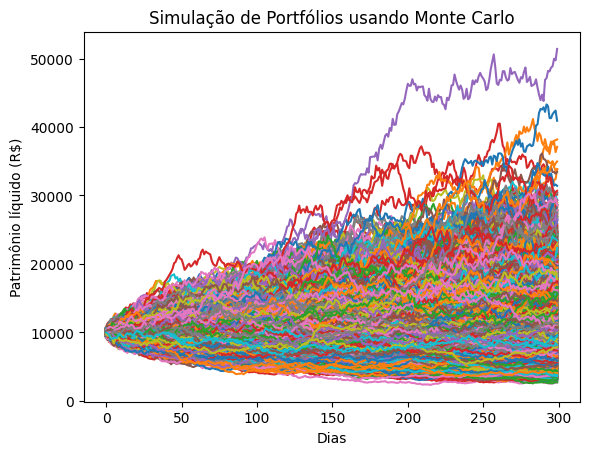

In [ ]:
plt.plot(portfolio_sims)
plt.ylabel('Patrimônio líquido (R$)')
plt.xlabel('Dias')
plt.title('Simulação de Portfólios usando Monte Carlo')
plt.show()

## 6. Isolando o portfólio vencedor

In [ ]:
retorno_portfolio = pd.DataFrame(portfolio_sims)

In [ ]:
retorno_portfolio

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,9921.778185,10072.665970,10472.478042,9938.243355,10066.606155,10060.192065,9671.255653,9561.370204,10091.720048,10010.910651,...,10117.437476,9783.350785,9892.443389,9613.288145,10143.223661,10077.151267,9624.588671,9661.669647,9754.869057,9962.614621
1,10020.176953,10039.687344,10575.015128,9941.779439,9857.632544,9715.060808,9588.865452,9888.620671,9935.274980,10229.053653,...,10179.334629,9786.191058,10019.174539,9454.395691,10020.955946,10380.718374,9986.868532,9472.945448,9548.502437,9839.036713
2,10311.751020,9656.617022,10668.745777,10039.240418,9821.435446,9531.683532,9542.697929,10475.308275,9759.551746,9979.568898,...,9914.224471,9398.179891,9845.592016,9375.718422,9773.567536,10345.740474,9952.087948,9649.153304,9578.959260,9576.558971
3,9830.041165,9642.415021,10458.942719,9902.865184,9587.495826,9474.830082,9290.698678,10284.919109,9911.478609,10221.256253,...,9770.794858,9769.651463,9593.702891,9346.598857,9919.704018,10502.138786,9991.295247,9784.472976,9293.922296,9204.020467
4,10280.892708,9665.786913,10615.628436,9863.742705,9575.231210,9737.100385,9278.385467,10307.411304,10050.630496,10150.339489,...,9695.967328,9767.047027,9765.822373,9198.808664,9814.516507,10005.964884,9861.263149,9952.798497,9075.393944,9066.312345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,7323.545420,10064.472252,9719.355500,12903.692520,8125.462537,3735.703314,6605.994873,16455.531888,7716.655159,12083.586316,...,5068.344365,4512.609512,4509.444651,7801.365703,10677.748990,5248.574431,10684.435074,11647.277711,7449.157390,9419.924679
296,7416.176195,9749.227071,9498.180800,12795.023355,8328.348457,3723.455663,6613.907648,16289.884572,7520.423954,12450.614959,...,5134.154394,4686.988279,4289.432386,7508.215324,10338.835329,5097.303226,10610.030797,11298.562968,7704.169860,8994.734503
297,7324.592418,9818.871267,9806.557607,12729.229835,8215.802024,3876.055012,6371.972500,15617.867408,7488.104671,12516.792394,...,5089.489985,4809.894253,4400.627887,7382.806848,10551.226709,4988.008522,11005.571495,11292.845546,7780.509108,8866.207061
298,7328.412158,9547.053639,9715.210629,12422.940893,8271.318736,3812.540635,6173.803462,15370.856419,7608.672565,12424.209342,...,5204.302999,4902.150141,4344.676185,7377.721373,10241.402489,4928.813713,11134.463722,11292.515647,7743.861365,9236.112335


In [ ]:
retorno_portfolio.iloc[-1].sort_values()

,299
5746,2693.031889
9352,2713.429287
3452,2738.822935
279,2973.879018
570,2990.982138
...,...
9071,34962.821156
1701,37098.362539
6261,38180.522367
8090,40912.474715


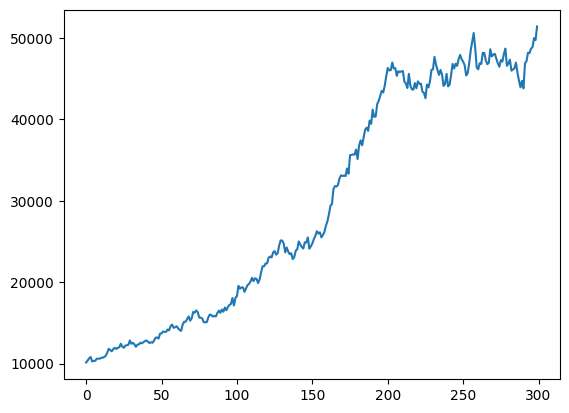

In [ ]:
retorno_portfolio[6204].plot();